#Importance of handling missing data
Missing data can skew anything for data scientists, from economic analysis to clinical trials. After all, any analysis is only as good as the data. A data scientist doesn’t want to produce biased estimates that lead to invalid results. The concept of missing data is implied in the name: it’s data that is not captured for a variable for the observation in question. Missing data reduces the statistical power of the analysis, which can distort the validity of the results

# Reasons behind Missing Values
 - People do not respond to survey (or specific questions in a survey).

- Data corruption is a major issue. Due to low maintenance, some parts of data are corrupted giving rise to missing data

- Species are rare and cannot be found or sampled.

- The individual dies or drops out before sampling.

- Some things are easier to measure than others.

- Data entry errors.

# Types of Missing Values
1. Missing Completely at Random (MCAR)

The missing data do not follow any particular pattern, they are simply random. The missing of these data is unrelated or independent of the remaining variables. It is not possible to predict these values with the rest of the variable data. For example, during the collection of data, a particular sample gets lost due to carelessness. This is an ideal case, where statistically the analysis will not be biased. But you shouldn’t assume the presence of MCAR unless very sure as it is a rare situation.

2. Missing At Random (MAR)

Here unlike MCAR, the data is missing amongst particular subsets. It is possible to predict if the data will be present/absent with the help of other features. But, you cannot predict the missing data themselves.

For example, let us consider a survey about time spent on the internet, which has a section about time spent on platforms like Netflix, amazon prime. It is observed that older people( above 45 years) are less likely to fill it than younger people. This is an example of MAR. Here, the ‘Age’ parameter decides if the data will be missing or not. MAR occurs very commonly than MCAR.
3. Not Missing at Random (NMAR)

This is a serious and tricky situation. Let’s say the purpose of the survey is to measure the overuse/addiction to social media. If people who excessively use social media, do not fill the survey intentionally, then we have a case of NMAR. This will most probably lead to a bias in results. The usual methods like dropping rows/columns, imputation will not work. To solve this, in-depth knowledge of the domain would be necessary.




# Ways to Handle Missing Values
- Deleting Rows with missing values
- Dropping columns 
- Impute missing values for continuous variable &categorical variable
- Other Imputation Methods
- Using Algorithms that support missing values
- Prediction of missing values
- Imputation using Deep Learning Library — Datawig

## We can divided them into tow main catgories:
1- Deletion

2- Imputation

We will look deeply into the pros and cons of each method ans when to use it

# Let's Check for missing values


we gonna use Titanic dataset from [Kagel]( https://www.kaggle.com/c/titanic/data?select=train.csv)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning/Datasets/titanic_train.csv')



We will check for missing values manualy with pandas and visualiy missnngo 

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Age.shape[0]
df.Cabin.shape[0]
df.Embarked.shape[0]

891

In [ ]:
print(df['Embarked'].isnull().sum()/df['Embarked'].shape[0]*100)
print(df['Age'].isnull().sum()/df['Age'].shape[0]*100)
print(df['Cabin'].isnull().sum()/df['Cabin'].shape[0]*100)


0.22446689113355783
19.865319865319865
77.10437710437711


# Let's viualiaz missing values usinf missnango

## 1- Barplot
The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present

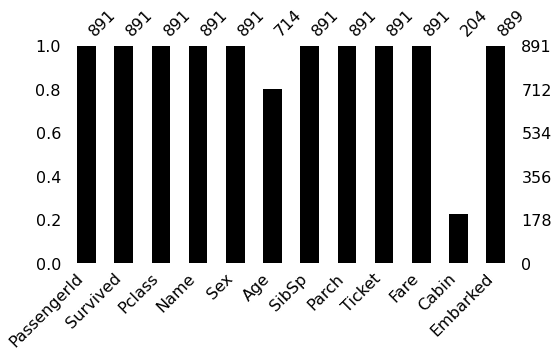

In [ ]:
msno.bar(df , figsize=(8,4), fontsize=16, log=False, color='black');

## 2- Using Matrix Plot
The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present

  Added benefit is You can view how that missing data is distributed in the dataframe.

In [ ]:
msno.matrix(df, figsize=(8, 4),color=(.25, .25, 0.5));


On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right. A closeup can be seen above. When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row the line will move towards the left.

## 3- Heatmap
Explolring corelation between features by heatmap
The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

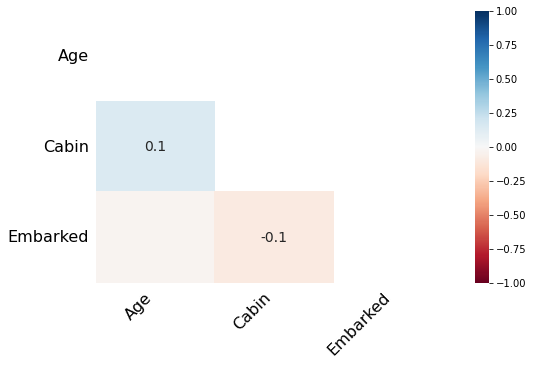

In [ ]:
msno.heatmap(df, figsize=(8, 5), fontsize=16, labels=True, cmap='RdBu');

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

#4- Dendrogram
The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.
If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

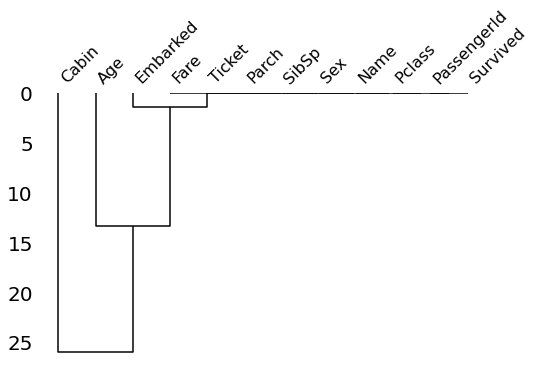

In [ ]:
msno.dendrogram(df , figsize=(8,5));


# Ways to handle missing values

## 1- Deleation

###  Dropping rows with missing values
Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.


AS ‘Embarked’ column has just 2 missing values. So, we can drop rows where this column is missing.

In [ ]:
df.dropna(subset=['Embarked'])

Note that we must pass parmetre inplace =True in order to delet it from the dataset bu we will keep it like this for now

### Dropping columns
When a column has large missing values, there is no point in imputing the values with the least available true data we have. So, when any column has greater than 80% of values missing, you can just drop that column from your analysis. In our case, ‘Cabin’ has 77% data missing, so you can take the choice of dropping this column.


Pros & Cons:

It is easy to handle but it leads to Loss of a lot of information and end up reducing the size of your dataset and make your model predictions biased. 

Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

# 2- Impiutation

# Imputation for continous variable



## 1-Imputation with mean & Median or constant using sklearn & pandas 

When a continuous variable column has missing values, you can calculate the mean| Median of the non-null values and use it to fill the vacancies. 


In the titanic dataset we have been using until now, ‘Age’ is a numeric column.

In [ ]:
df['Age'].isnull().sum()

177

Using simple imputertur Sklearn
you can select strategy= ['mean', 'median', 'most_frequent', 'constant']   

In [ ]:
#Using simpleImputer in Sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Age']])


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

Note that if we want to apply the changes to the columns we should use transform method or fit_transform

In [ ]:
#using pandas
df['Age'].replace(np.NaN , df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Mean imputation has certain disadvantages. If the data has a very uneven distribution, with many outliers, then the Mean will not reflect the actual distribution of the data. Mean is affected greatly by extreme values or outliers. So, if the data doesn’t have many outliers and follows near-normal distribution, use mean imputation

 The advantage of the median is, it is unaffected by the outliers

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df[['Age']])

In [ ]:
df['Age'].replace(np.NaN , df['Age'].median())
df['Age'].head(6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.642093
Name: Age, dtype: float64

Similarly, you can perform mode imputation also. 

Generally, Imputation with the most frequent (mode) is popular for categorical missing values

# 2- Apply ML Algorathims to impute missing value ( KNNImputer or IterativeImputer from Sklearn)

##KNN Imputer:
The idea in KNN methods is to identify ‘k’ samples in the dataset that are similar or close in the space. Then we use these ‘k’ samples to estimate the value of the missing data points. Each sample’s missing values are imputed using the mean value of the ‘k’-neighbors found in the dataset.
The points with the shortest distance based on Euclidean distances are considered to be the nearest neighbors.
In the presence of missing coordinates, the Euclidean distance is calculated by ignoring the missing values and scaling up the weight of the non-missing coordinates where the weight = no of codiants/no of present cordiants.
For example, the Euclidean distances between two points (3, NA, 5) and (1, 0, 0) is: 

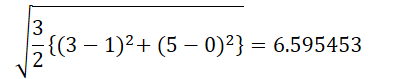












In [ ]:
[df['Age'].isnull().sum()]

[177]

In [ ]:
X = df[['Age','Fare' , 'Pclass' ,'SibSp' ,'Survived' ]].values
X

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ],
       ...,
       [    nan, 23.45  ],
       [26.    , 30.    ],
       [32.    ,  7.75  ]])

[177]

In [ ]:
from sklearn.impute import KNNImputer
k_imputer = KNNImputer()
k_imputer.fit_transform(X)



array([[22.    ,  7.25  ,  3.    ,  1.    ,  0.    ],
       [38.    , 71.2833,  1.    ,  1.    ,  1.    ],
       [26.    ,  7.925 ,  3.    ,  0.    ,  1.    ],
       ...,
       [31.8   , 23.45  ,  3.    ,  1.    ,  0.    ],
       [26.    , 30.    ,  1.    ,  0.    ,  1.    ],
       [32.    ,  7.75  ,  3.    ,  0.    ,  0.    ]])

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found





In [ ]:
k_imputer.n_neighbors

5

Research suggests that it is imperative to test the model using cross-validation after performing imputation with different values of k. Although the imputation of missing values is a continuously evolving field of study, kNN act as a simple and effective strategy.

#Iterative Imputer:
Bulding regreesion Model between non-missing values features as predictors wihh misiinng value feature as response 
it regresses a feature with missing values on the dataset’s other features and then replaces the missing values with the predicted value from the regression model.
Like KNN Imputer, Iterative Imputer should replace missing values with the feature mean when there is no relationship between features, as the random regression coefficients offset. Alternatively, when correlations between features do exist, Iterative Imputer will base the imputed value on the correlations with all other features.

- While it has all of the same benefits as KNN Imputer, producing more accurate estimates of missing values with less manual labor, Iterative Imputer uses a different strategy for getting there.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
X = df[['Age','Fare' , 'Pclass' ,'SibSp' ,'Survived' ]].values
X

array([[22.    ,  7.25  ,  3.    ,  1.    ,  0.    ],
       [38.    , 71.2833,  1.    ,  1.    ,  1.    ],
       [26.    ,  7.925 ,  3.    ,  0.    ,  1.    ],
       ...,
       [    nan, 23.45  ,  3.    ,  1.    ,  0.    ],
       [26.    , 30.    ,  1.    ,  0.    ,  1.    ],
       [32.    ,  7.75  ,  3.    ,  0.    ,  0.    ]])

In [ ]:
# new in 21, and still "experimental" so it must be enabled explicitly
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it_imputer =  IterativeImputer(random_state=42 ,)   
it_imputer.fit_transform(X)

array([[22.        ,  7.25      ,  3.        ,  1.        ,  0.        ],
       [38.        , 71.2833    ,  1.        ,  1.        ,  1.        ],
       [26.        ,  7.925     ,  3.        ,  0.        ,  1.        ],
       ...,
       [24.42314142, 23.45      ,  3.        ,  1.        ,  0.        ],
       [26.        , 30.        ,  1.        ,  0.        ,  1.        ],
       [32.        ,  7.75      ,  3.        ,  0.        ,  0.        ]])

In [ ]:
from sklearn.metrics import mean_squared_error


Simple imputation strategies such as using the mean or median can be effective when working with univariate data. When working with multivariate data, more advanced imputation methods such as iterative imputation can lead to even better results. Scikit-learn’s IterativeImputer provides a quick and easy way to implement such a strategy.

# Impute missing values for a categorical feature!!
When the percentage of missing values is less, Mode (most frequent) is preferred. It does not cause a huge loss of data, and it is statistically relevant.
But if you have a lot of missing values, then it doesn’t make sense to impute with the most frequent class. Instead, let us create a separate category for missing values like “Unknown” or “Unavailable”. The number of classes will be increased by one.

Develop a model to predict missing values: One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

1. Impute the most frequent value
2. Impute the value "missing" or "Unknown" , which treats it as a separate category
3. Apply ML Models like Calssfication or unsprviesed clustring models 




## 1-Impute the most frequent value

In [ ]:
print(df['Embarked'].isnull().sum())

df['Embarked'].value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
simputer = SimpleImputer(strategy='most_frequent')
simputer.fit_transform(df[['Embarked']])


You can always impute them based on Mode in the case of categorical variables, just make sure you don’t have highly skewed class distributions.

NOTE: But in some cases, this strategy can make the data imbalanced wrt classes if there are a huge number of missing values present in our dataset.

## 2- Impute the value "missing" or "Unknown" , which treats it as a separate category

In [ ]:
from sklearn.impute import SimpleImputer
simputer = SimpleImputer(strategy='constant', fill_value='Missing')
simputer.fit_transform(df[['Embarked']])

##3- Apply ML spurvised and unsprviesed  Models to impute values

1.   Logistic Regression
2.   KMeans 



Develop a model to predict missing values: One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.




As cabin has 77% null values we can't ipute using constant or avreage varaible so we will do it using models

In [ ]:
df=df.copy()
df['Cabin'].isnull().sum()/df.shape[0]

0.7727784026996626

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#encoding male and famele vaeiables
df['Sex'] = [1 if x=="male" else 0 for x in df["Sex"]]
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.25,NaN,S


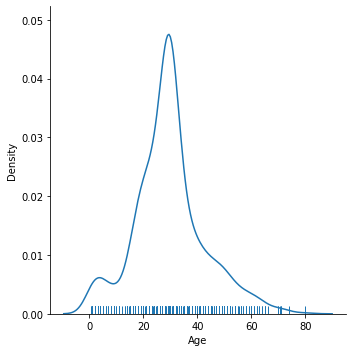

In [ ]:
sns.displot(df['Age'] , kind='kde' ,rug=True);

Since Age feature follow normal disrtuption we could go for Standrization scalers

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Age = scaler.fit_transform(df[['Age']].values)

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           2
Name             0
Sex              0
Age              2
SibSp            2
Parch            0
Ticket           0
Fare             2
Cabin          687
Embarked         0
scaled_Age       2
scaled_fare      2
dtype: int64

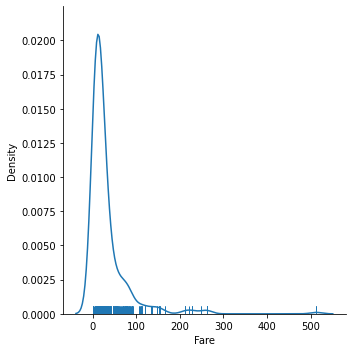

In [ ]:
sns.displot(df['Fare'] , kind='kde',rug=True)

In [ ]:
df['Fare'].skew()

4.806870348005274

Since fare are +ve skewd to the right we have to perform noramlization scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
scaled_fare = scaler_1.fit_transform(df[['Fare']])



In [ ]:
df['scaled_fare'] = scaled_fare
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,scaled_Age,scaled_fare
0,1,0,3.0,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,NaN,S,-0.596478,0.014151
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,71.2833,C85,C,0.643973,0.139136
2,3,1,3.0,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S,-0.286365,0.015469
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,S,0.411389,0.103644
4,5,0,3.0,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,NaN,S,0.411389,0.015713


In [ ]:
df_new = df.copy()
df_.isnull().sum()


PassengerId      0
Survived         0
Pclass           2
Name             0
Sex              0
Age              2
SibSp            2
Parch            0
Ticket           0
Fare             2
Cabin          687
Embarked         0
scaled_Age       2
scaled_fare      2
dtype: int64

In [ ]:
###
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']
###

In [ ]:
#spilliting data into train and test data
test_data = df[df['Cabin'].isnull()]
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,scaled_Age,scaled_fare
0,1,0,3.000000,"Braund, Mr. Owen Harris",1,22.000000,1.000000,0,A/5 21171,7.250000,NaN,S,-0.596478,0.014151
2,3,1,3.000000,"Heikkinen, Miss. Laina",0,26.000000,0.000000,0,STON/O2. 3101282,7.925000,NaN,S,-0.286365,0.015469
4,5,0,3.000000,"Allen, Mr. William Henry",1,35.000000,0.000000,0,373450,8.050000,NaN,S,0.411389,0.015713
5,6,0,3.000000,"Moran, Mr. James",1,29.642093,0.000000,0,330877,8.458300,NaN,Q,-0.004000,0.016510
7,8,0,3.000000,"Palsson, Master. Gosta Leonard",1,2.000000,3.000000,1,349909,21.075000,NaN,S,-2.147042,0.041136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3.000000,"Sutehall, Mr. Henry Jr",1,29.642093,1.000000,0,SOTON/OQ 392076,23.450000,NaN,S,-0.004000,0.045771
885,886,0,1.000000,"Rice, Mrs. William (Margaret Norton)",0,26.000000,0.000000,5,382652,30.000000,NaN,Q,-0.286365,0.058556
886,887,0,3.000000,"Montvila, Rev. Juozas",1,32.000000,0.000000,0,211536,7.750000,NaN,S,0.178804,0.015127
888,889,0,2.313416,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.657261,0.523112,2,W./C. 6607,32.053804,NaN,S,-0.002824,0.062565


In [ ]:
x_train = train_data[['scaled_Age', 'scaled_fare' ,'Pclass']]

y_train = train_data['Cabin']

In [ ]:
test_data = df[df['Cabin'].isnull()]
test_data
x_test =test_data[['Age','Survived','Sex','Fare','Pclass']]
y_test = test_data['Cabin']


In [ ]:
y_predict = df[df['Cabin'].isnull()]
y_predict = y_predict.values

Let's fit logistic Regreesion to our data

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()
#model.fit(scaled_x_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(y_predict)


## Unsprviesed clustring models

In [ ]:
X = df[['Age' , 'Survived' ,'Sex' , 'Fare' ,'Pclass']].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.5924806 , -0.78927234,  0.        , -0.50244517,  0.82737724],
       [ 0.63878901,  1.2669898 ,  0.        ,  0.78684529, -1.56610693],
       [-0.2846632 ,  1.2669898 ,  0.        , -0.48885426,  0.82737724],
       ...,
       [ 0.        , -0.78927234,  0.        , -0.17626324,  0.82737724],
       [-0.2846632 ,  1.2669898 ,  0.        , -0.04438104, -1.56610693],
       [ 0.17706291, -0.78927234,  0.        , -0.49237783,  0.82737724]])

Lets detect how many value in  the column we want to cluster  

In [ ]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=3 , init='k-means++' , random_state=42)
clustred_x = cls.fit(scaled_X)


In [ ]:
clustred_x.labels_

array([0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1,

In [ ]:
df[df['Cabin'].isnull()].index

Int64Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
            ...
            878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
           dtype='int64', length=687)

# Refrences
- https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
- https://www.analyticsvidhya.com/blog/2021/10/end-to-end-introduction-to-handling-missing-values/
- http://www.simonqueenborough.info/R/basic/missing-data
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
- https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/
- https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38
